In [1]:
import torch
import torchvision
import torch.optim as optim
import torch.nn as nn


import sys
sys.path.append("..")
from src.load_data import load_CIFAR10
from src.preprocess import transform_CIFAR10
from src.plotting import imshow
from model.CNN import CNN
from src.train_predict import train, test_classification


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
batch_size = 4

train_set, test_set = load_CIFAR10()
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size = batch_size, \
                                               shuffle = True, num_workers = 0)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size = batch_size, \
                                               shuffle = True, num_workers = 0)

In [4]:
classes = train_set.classes


Training

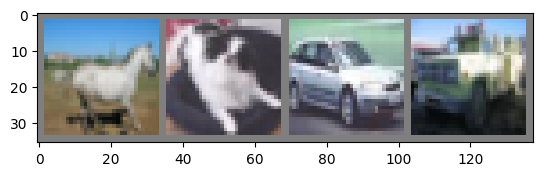

<generator object <genexpr> at 0x000002295C1F1540>


In [5]:
dataiter = iter(train_dataloader)
img, labels = next(dataiter)

imshow(torchvision.utils.make_grid(img))
print(" ".join(f'{classes[labels[j]]}') for j in range(batch_size))


In [6]:
img.shape

torch.Size([4, 3, 32, 32])

In [7]:
model = CNN(input_feature= 3, hidden_units= 10, output_feature= len(classes))

model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9)


In [8]:
train(num_loops= 10, criterion= criterion, optim= optimizer, model= model, \
      train_dataloader= train_dataloader, device= device, path = "CNN_cifar10.pth")

[1,  2000] loss: 1.943
[1,  4000] loss: 1.741
[1,  6000] loss: 1.713
[1,  8000] loss: 1.654
[1, 10000] loss: 1.661
[1, 12000] loss: 1.649
[2,  2000] loss: 1.612
[2,  4000] loss: 1.608
[2,  6000] loss: 1.625
[2,  8000] loss: 1.600
[2, 10000] loss: 1.611
[2, 12000] loss: 1.589
[3,  2000] loss: 1.560
[3,  4000] loss: 1.573
[3,  6000] loss: 1.578
[3,  8000] loss: 1.578
[3, 10000] loss: 1.568
[3, 12000] loss: 1.561
[4,  2000] loss: 1.528
[4,  4000] loss: 1.547
[4,  6000] loss: 1.560
[4,  8000] loss: 1.569
[4, 10000] loss: 1.550
[4, 12000] loss: 1.537
[5,  2000] loss: 1.500
[5,  4000] loss: 1.549
[5,  6000] loss: 1.513
[5,  8000] loss: 1.540
[5, 10000] loss: 1.540
[5, 12000] loss: 1.532
[6,  2000] loss: 1.518
[6,  4000] loss: 1.548
[6,  6000] loss: 1.535
[6,  8000] loss: 1.520
[6, 10000] loss: 1.528
[6, 12000] loss: 1.517
[7,  2000] loss: 1.497
[7,  4000] loss: 1.505
[7,  6000] loss: 1.502
[7,  8000] loss: 1.539
[7, 10000] loss: 1.502
[7, 12000] loss: 1.521
[8,  2000] loss: 1.524
[8,  4000] 

Testing

In [9]:
model_pred = CNN(input_feature= 3, hidden_units= 10, output_feature= len(classes))
model_pred.load_state_dict(torch.load("CNN_cifar10.pth"))

<All keys matched successfully>

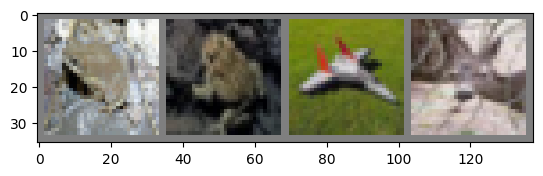

Ground truth:  frog frog airplane deer
Predict:  frog frog horse horse


In [10]:
dataiter = iter(test_dataloader)
img, labels = next(dataiter)
_, predicts = torch.max(model_pred(img), 1)


imshow(torchvision.utils.make_grid(img))
print("Ground truth: ", " ".join(f"{classes[labels[j]]}" for j in range(batch_size)))
print("Predict: ", " ".join(f"{classes[predicts[j]]}" for j in range(batch_size)))


In [11]:
test_classification(model= model_pred, test_dataloader= test_dataloader, \
                    device= device, classes= classes)

Accuracy of the network in the test dataset: 45 %
Accuracy for class airplane: 22.9
Accuracy for class automobile: 46.4
Accuracy for class bird: 24.9
Accuracy for class cat: 12.5
Accuracy for class deer: 55.9
Accuracy for class dog: 61.7
Accuracy for class frog: 45.7
Accuracy for class horse: 43.8
Accuracy for class ship: 66.2
Accuracy for class truck: 73.5
